In [16]:
import ultralytics
ultralytics.__version__

'8.2.53'

In [17]:
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from sklearn.cluster import KMeans
from tensorflow.keras.models import model_from_json
#from tracker import*
model = YOLO('yolov8s.pt')

In [18]:
class_list = ['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']

In [19]:
#track = tracked()
#count = 0

In [20]:
file_path = "C:/Users/prash/Downloads/pept.jpg"
image = cv2.imread(file_path)
image = cv2.resize(image,(1000,600))
results = model.predict(image)


0: 384x640 14 persons, 6 cars, 1 bus, 10 traffic lights, 1 backpack, 2 handbags, 392.6ms
Speed: 84.0ms preprocess, 392.6ms inference, 24.1ms postprocess per image at shape (1, 3, 384, 640)


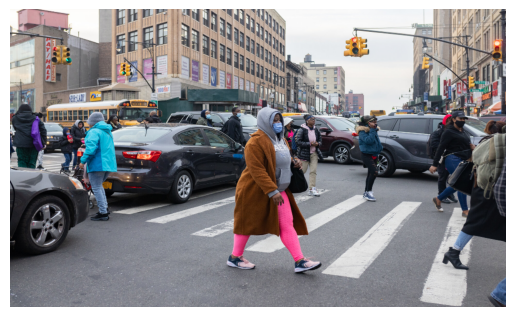

In [21]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [22]:
a = results[0].boxes.data
b = a.detach().cpu().numpy()
px = pd.DataFrame(b).astype("float")


In [23]:
list = []
p_list = []

In [24]:
for index,row in px.iterrows():
    x1 = int(row[0])
    y1 = int(row[1])
    x2 = int(row[2])
    y2 = int(row[3])
    d = int(row[5])
    if d == 2:
        list.append([x1,y1,x2,y2])
    elif d == 0:
        p_list.append([x1,y1,x2,y2])

In [25]:
for vals in list:
    x,y,w,h = vals
    int_img = image[y:h,x:w]
    int_img = cv2.cvtColor(int_img, cv2.COLOR_BGR2RGB)
    pixels = int_img.reshape(-1, 3)
    kmeans = KMeans(n_clusters=1)
    kmeans.fit(pixels)
    dominant_color = kmeans.cluster_centers_[0]
    [R,G,B] = dominant_color
    [R,G,B] = [round(R),round(G),round(B)]
    cv2.rectangle(image,(x,y),(w,h),(R,G,B),2)


C:\Users\prash\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\prash\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\prash\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\prash\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

In [26]:
def InitializeModel(json_file, weights_file):
    with open(json_file, "r") as file:
        loaded_model_json = file.read()
        model = model_from_json(loaded_model_json)

    model.load_weights(weights_file)
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

    return model

In [27]:
Genmodel = InitializeModel("model_gender1.json","gender_model_weights1.h5")
GENDER_LIST = ["Female", "Male"]
for vals in p_list:
    x,y,z,w = vals
    int_img = image[y:w,x:z]
    int_img = cv2.cvtColor(int_img, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(int_img,(64,64))
    predicted_gender = GENDER_LIST[np.argmax(Genmodel.predict(roi[np.newaxis,:,:,np.newaxis]))]
    if predicted_gender == "Female":
        color = (203,192,255)
    else:
        color = (235,206,135)
    cv2.rectangle(image,(x,y),(z,w),color,2)
    


1/1 [==============================] - 0s 22ms/step


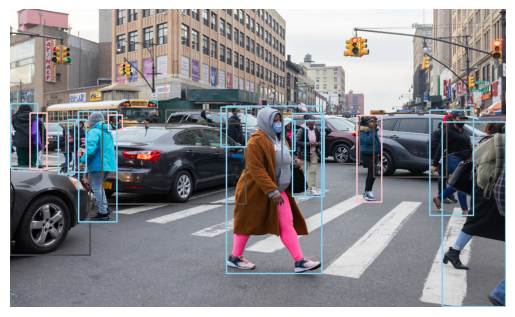

In [28]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [29]:
#len(p_list)

In [30]:
#plt.imsave("nimage.jpeg",cv2.cvtColor(image, cv2.COLOR_BGR2RGB))